# 22회 모의고사

## 문제 1
1-1 탐색적 데이터 분석 수행(시각화 포함)

1-2 이상치 처리(이상값 대체방안 제시)

1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''
Pregnancies  임신: 임신 횟수
Glucose 포도당: 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
BloodPressure 혈압: 이완기 혈압(mmHg)
SkinThickness: 삼두근 피부 주름 두께(mm)
인슐린: 2시간 혈청 인슐린(mu U/ml)
BMI: 체질량 지수(체중(kg)/(높이(m)^2)
DiabetesPedigreeFunction: 당뇨병 가계도 기능
나이: 나이(년)
결과: 클래스 변수(0 또는 1)

==>  당뇨병이 있는지 없는지 측정
'''
data = pd.read_csv('./data/22회/data1.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1-1 탐색적 데이터 분석 수행(시각화 포함)
data1 데이터 셋은 768건과 9개 columns을 가지고 있으며, float64(2), int64(7)로 구성되어 있다.

In [41]:
'''
BloodPressure,SkinThickness,Insulin,BMI,Age 의 최대값을 확인
'''
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [5]:
'''
결측 데이터는 존재 하지 않는다.
'''
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

['Age', 'Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']


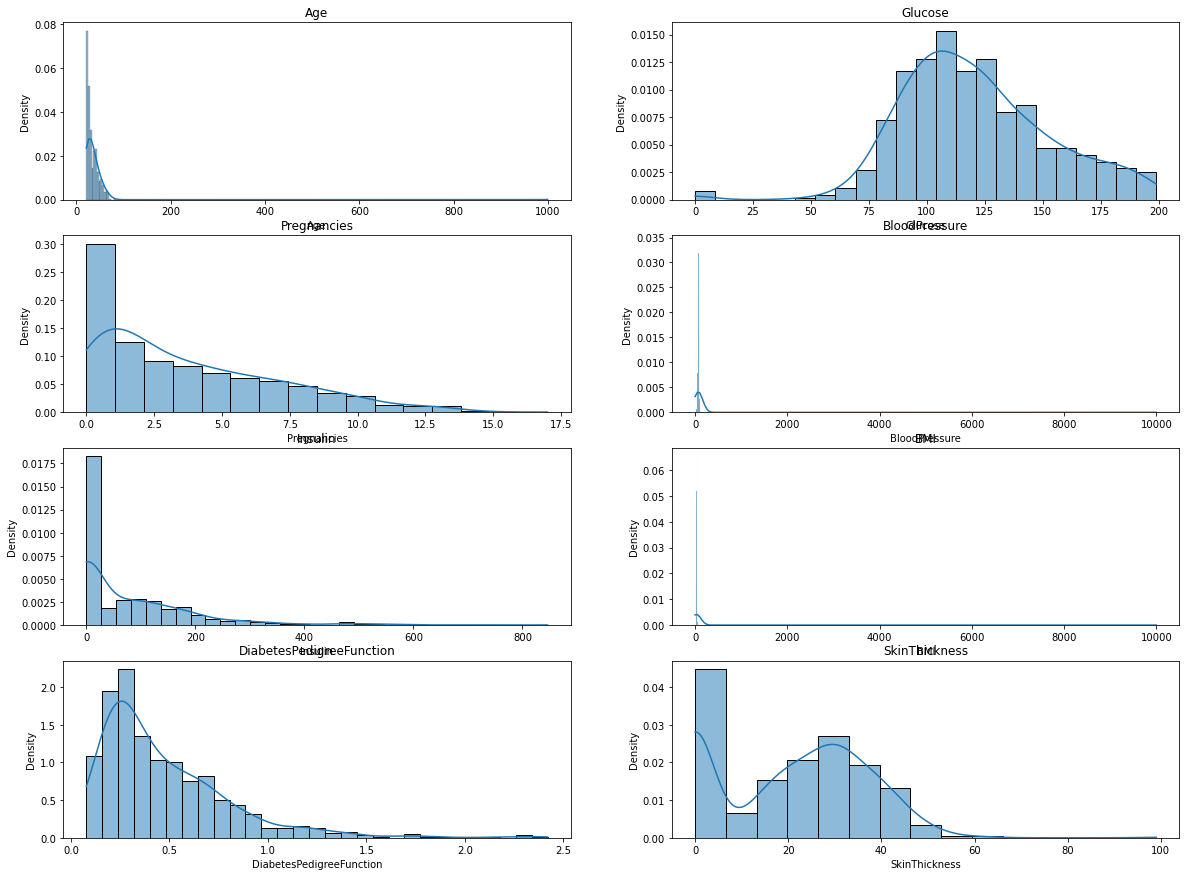

In [38]:
n = 1
print(numerical_features)

plt.figure(figsize=(20,15)) # 먼저 창을 만들고
for col in numerical_features:
    ax = plt.subplot(4,2,n)
    sns.histplot(data.loc[data[col].notnull(), col],kde=True,stat="density")
    plt.title(col)
    n += 1   
     
plt.show()

['Age', 'Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']


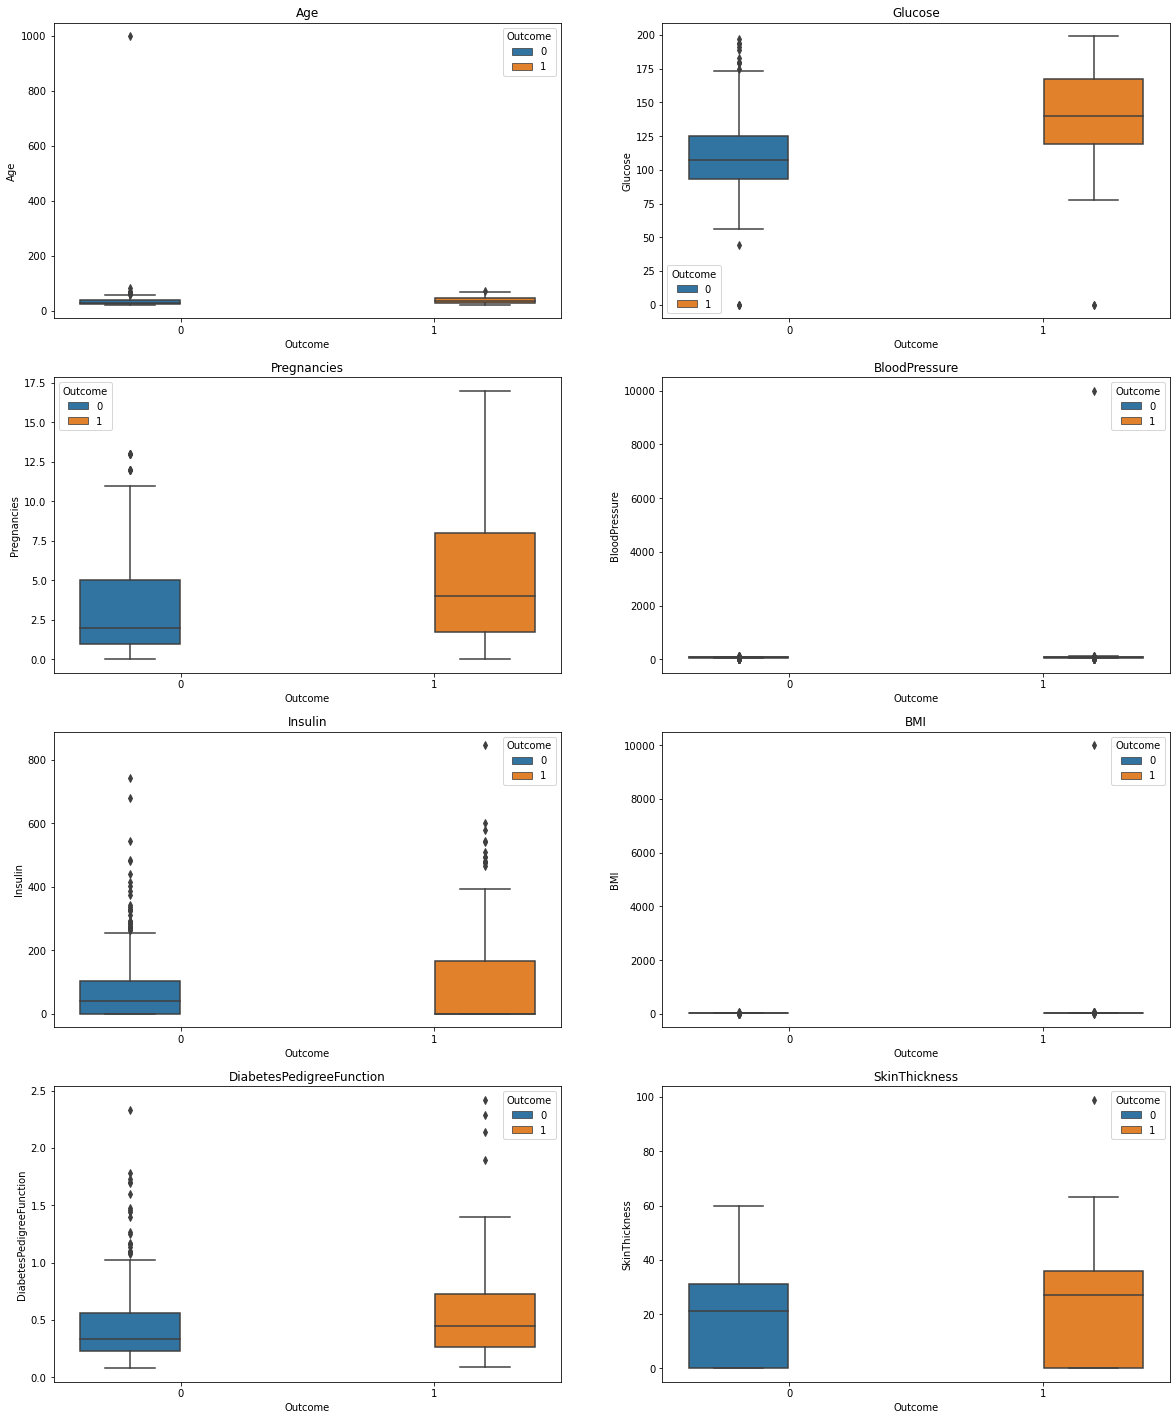

In [42]:
n = 1
print(numerical_features)

plt.figure(figsize=(20,25)) # 먼저 창을 만들고
for col in numerical_features:
    ax = plt.subplot(4,2,n)
    sns.boxplot(y = col, x='Outcome', hue='Outcome', data= data.dropna())
    plt.title(col)
    n += 1   
     
plt.show()

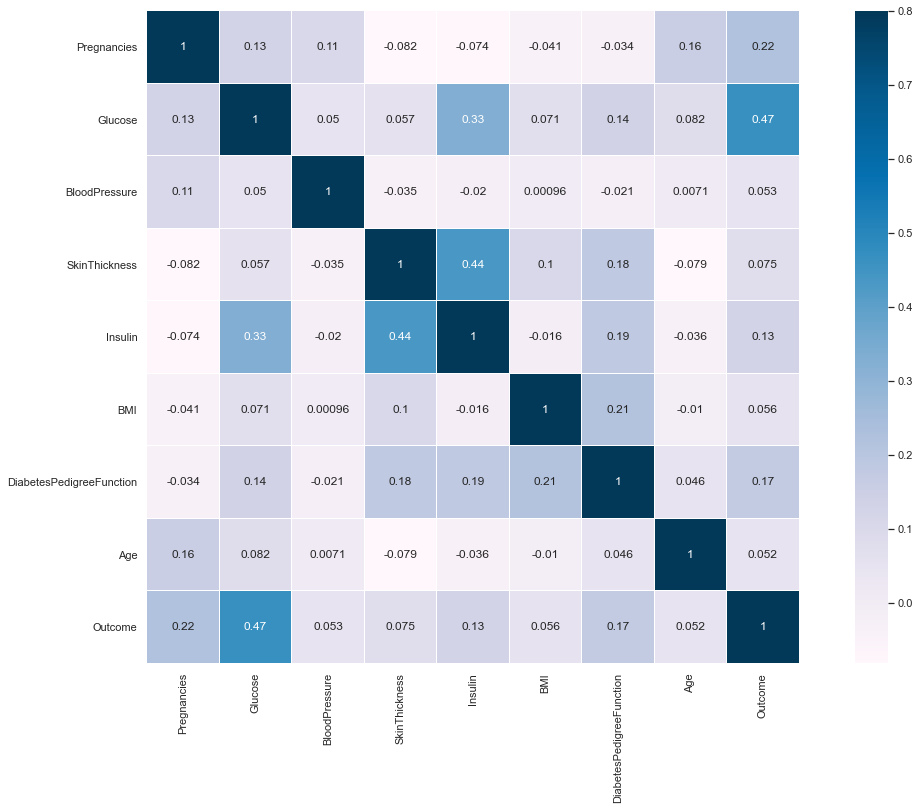

In [47]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax = plt.subplots(figsize=(20,12))

sns.heatmap(data.corr(),square=True, linewidths=0.1, cmap=colormap,
           linecolor="white", vmax=0.8, annot=True)
plt.show()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

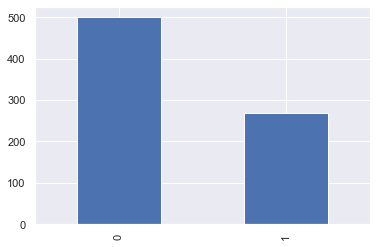

In [51]:
display(data['Outcome'].value_counts())
data['Outcome'].value_counts().plot(kind='bar')

### 1-2 이상치 처리(이상값 대체방안 제시)

In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [55]:
data[data['Age'] ==999]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119,0,0,0,19.6,0.832,999,0


In [56]:
data[data['Pregnancies'] ==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [57]:
data[data['Glucose'] ==199]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1


<AxesSubplot:>

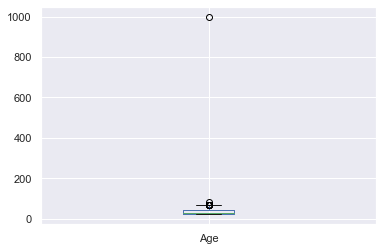

In [77]:
data['Age'].plot(kind ='box')

# sns.boxplot(y = 'Age', x='Outcome', hue='Outcome', data= data.dropna())

### IQR * 1.5 를 기준으로 경계값 너머의 이상치들을 상한값, 하한값으로 치환

-1.5 66.5
37.125 202.125
-6.5 13.5
35.0 107.0
-190.875 318.125
13.35 50.550000000000004
-0.32999999999999996 1.2
-48.0 80.0


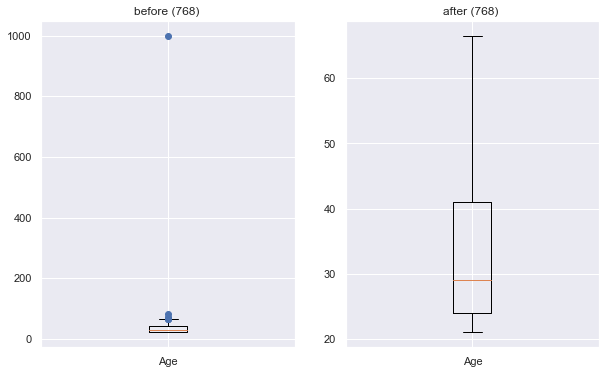

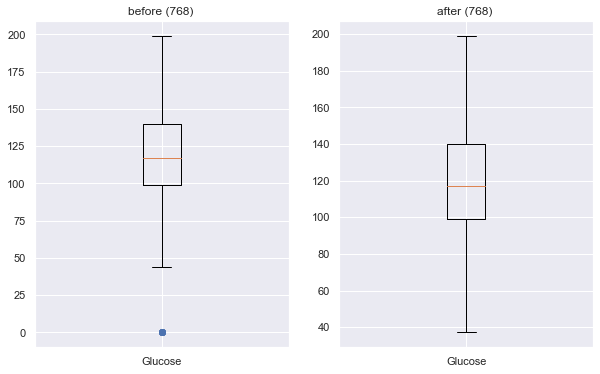

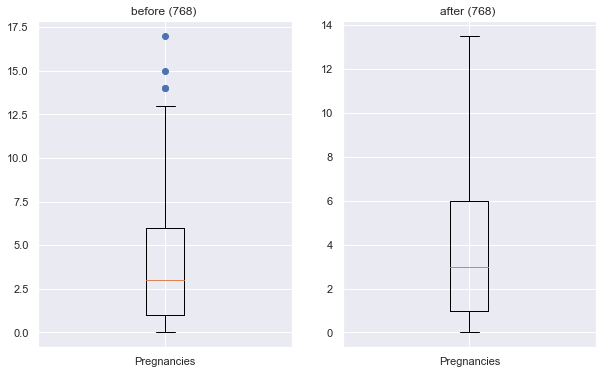

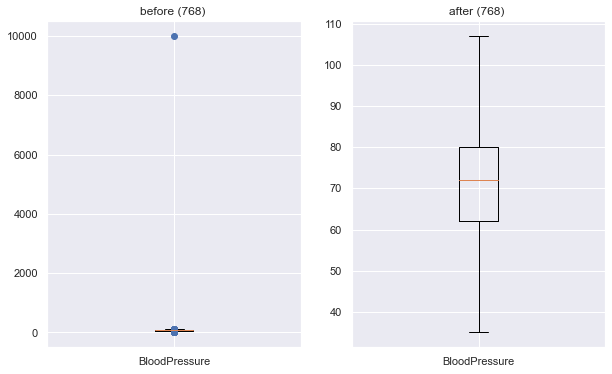

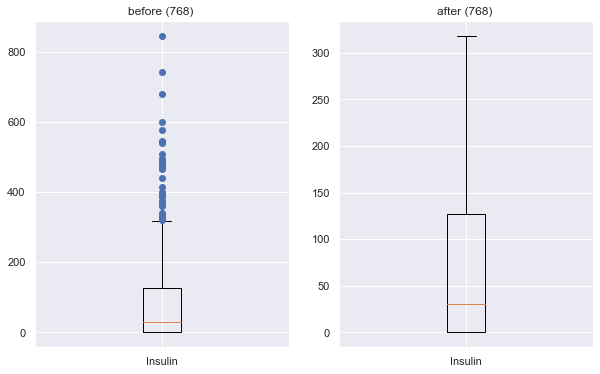

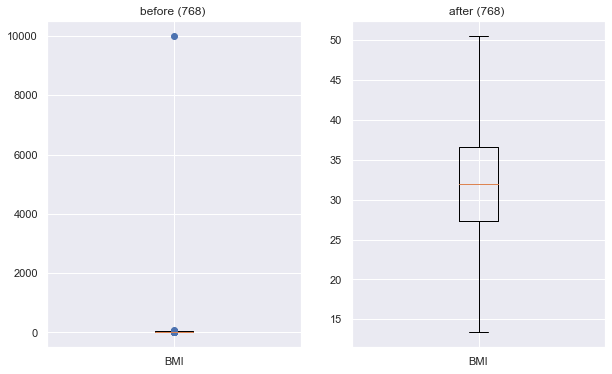

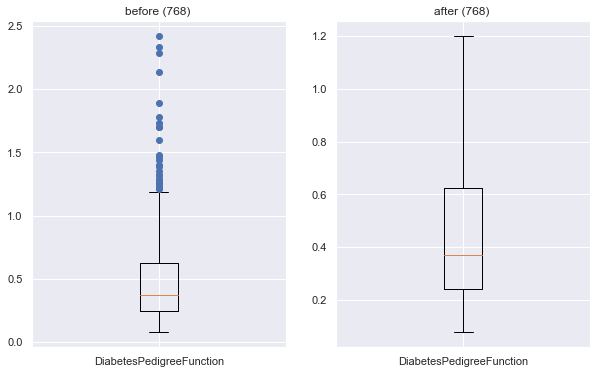

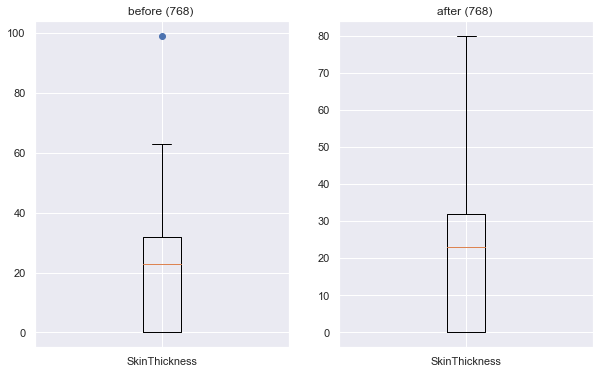

In [89]:
data_new = pd.DataFrame()

for col in numerical_features:
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    line_down = data[col].quantile(0.25) - iqr*1.5
    line_up = data[col].quantile(0.75) + iqr*1.5
    print(line_down, line_up)
    winsorized = data[col].clip(line_down,line_up)
    data_new.insert(data_new.shape[1], col, winsorized)
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    ax1.boxplot(data[col], labels=[col], sym="bo")
    ax1.set_title('before (%s) '%data[col].shape)
#     ax1.set_ylim(0,100)
    
    ax2.boxplot(winsorized, labels=[col])
    ax2.set_title('after (%s) '%winsorized.shape)

plt.show()

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성
- 독립변수가 데이터가 불균형 하다. 로그 변환 및 box cox 변환등을 생각해보자
- 변수가 크기가 다르기 때문에 scaling가 필요


## 문제 2
2-1 오버샘플링 과정 설명하고 결과 작성

2-2 언더샘플링 과정 설명하고 결과 작성

2-3 둘 중 선택하고 이유 설명

### 2-1 오버샘플링 과정 설명하고 결과 작성

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

data_new = pd.DataFrame(stand.fit_transform(data_new), columns = data_new.columns)

In [102]:
target = data['Outcome']

X_train, X_test , y_train, y_test = train_test_split(data_new, target, 
                                                     test_size=0.3, stratify=target, random_state=123)

In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_train_smote.shape, y_train_smote.shape)
print(y_train.value_counts())

print(y_train_smote.value_counts())

(537, 8) (537,)
(700, 8) (700,)
0    350
1    187
Name: Outcome, dtype: int64
0    350
1    350
Name: Outcome, dtype: int64


### 2-2 언더샘플링 과정 설명하고 결과 작성

In [106]:
from imblearn.under_sampling import CondensedNearestNeighbour
X_train_cnn, y_train_cnn = CondensedNearestNeighbour(random_state=0).fit_resample(X_train,y_train)

print(X_train.shape, y_train.shape)
print(X_train_cnn.shape, y_train_cnn.shape)
print(y_train.value_counts())

print(y_train_cnn.value_counts())

(537, 8) (537,)
(311, 8) (311,)
0    350
1    187
Name: Outcome, dtype: int64
1    187
0    124
Name: Outcome, dtype: int64


### 2-3 둘 중 선택하고 이유 설명
오버 샘플링인 SMOTE를 선택

이유는 언더 샘플링 같은경우는 다수의 클레스 데이터를 제거 하기 때문에 정보 손실이 발생


## 문제 3
3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

3-2 모델 비교하고 결과 설명

3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

result_time = []
result_accuracy = []

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)
end = time.time() - start

result_time.append(end)
result_accuracy.append(accuracy_score(y_test, lr_pred))

start = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)
rfc_pred = rfc.predict(X_test)
end = time.time() - start

result_time.append(end)
result_accuracy.append(accuracy_score(y_test, rfc_pred))


start = time.time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)
gbc_pred = gbc.predict(X_test)
end = time.time() - start

result_time.append(end)
result_accuracy.append(accuracy_score(y_test, gbc_pred))


In [117]:
result_time_df = pd.DataFrame(result_time, columns=['Time'], 
    index =['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier'])

In [118]:
result_accuracy_df = pd.DataFrame(result_accuracy, columns=['accuracy'], 
    index =['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier'])

### 3-2 모델 비교하고 결과 설명

In [122]:
result_time_df

,Time
LogisticRegression,0.007010
RandomForestClassifier,0.143613
GradientBoostingClassifier,0.108685


In [123]:
result_accuracy_df

,accuracy
LogisticRegression,0.800866
RandomForestClassifier,0.779221
GradientBoostingClassifier,0.748918


Answer 

속도도 그렇고 정확도에서 LogisticRegression가 제일 좋았다. 

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [128]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_smote_pca = pca.fit_transform(X_train_smote)
np.cumsum(pca.explained_variance_ratio_)

array([0.25605574, 0.49041384, 0.61086394, 0.72790428, 0.83477036,
       0.90908909, 0.96012441, 1.        ])

In [135]:
pca = PCA(n_components=5)
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_smote_pca, y_train_smote)
lr_pred = lr.predict(X_test_pca)
end = time.time() - start

pca_df = pd.DataFrame([end], columns=['Time'], index =['LogisticRegression_PCA'])

result_time_df.append(pca_df)

,Time
LogisticRegression,0.007010
RandomForestClassifier,0.143613
GradientBoostingClassifier,0.108685
LogisticRegression_PCA,0.002993


## 문제 4
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

dataset : /kaggle/input/adpkrp5/content.csv

# 모분산의 추정과 검정
어떤 공장에서 일정 크기의 볼트를 만든다고 해보자. 제조 공정에서 볼트의 지름이 일정해야 품질 기준을 만족할 수 있다. 볼트의 지름이 10mm 여야하는데, 평균적으로는 10mm 이지만, 분산이 존재해  불량품이 일정 부분 존재한다. 이런 상황에서 볼트 지름의 분산을 확인하는 방법으로 모분산에 대한 추론을 할 수 있다. 


모분산의 추정에는 카이제곱 분포를 이용한다. 카이제곱분포는 표준정규분포에서 n개의 샘플을 뽑아서 그것들의 제곱을 모두 합한 것을 하나의 확률 변수 Q 로 정의하자. 카이제곱분포는 Q 가 따르는 분포이다. 카이제곱 분포는 하나의 모수 n 을 갖고, 이를 자유도라 한다.

$Q = \sum^{n}_{i=1} Z_i$

$Q \sim \chi (n)$

모분산은 아래 통계량이 자유도가 n-1 인 통계량을 따른다는 것으로부터 추정된다. 

$\frac{(n-1)s^2}{\sigma^2} \sim \chi(n-1)$

따라서 chi-square 분포의 additivity 에 의해 아래와 같다. 

$\frac{(n-1)s^2}{\sigma^2} \sim \chi(n-1)$

한 가지 유의할점은 모집단 X 가 정규분포를 따라야 이러한 분포가 타당하다는 것이다. 

<font size="5"> 그리고 $\sigma^2$ , $s^2$ 분산이다 , 주어지는 문제에서 분산을 주는지 표준편차를 주는지 확인해야해</font>

<font size="5">예제 </font>

1) 공장에서 볼트의 분산이 1mm 보다 작아야 현재 생산 공정을 유지하기로 했다. n=100 개의 샘플을 고른 후, 표본 분산을 추정했을 때, 1.2mm 가 나왔다면, 모분산이 1mm 보다 크다고 볼 수 있는지 유의수준 0.05 하에서 검정하라  

검정 통계량은 아래와 같이 계산된다.

$\frac{(99)1.2}{1} = 111.8$

$Q \sim \chi(99)$

$P (Q > 111.8) = 0.178$

p-value 가 0.178로 0.05 보다 크므로 모분산이 1mm 보다 크다고 할 수 없다. 



2) 모분산의 95% 신뢰구간을 구하라

모분산의 신뢰구간은 아래와 같은 식으로 구할 수 있다. 아래 신뢰구간은 통계량이 카이제곱 분포를 따른다는 사실을 통해 쉽게 확인할 수 있다

<font size="5">$[\frac{(n-1)s^2}{\chi_{0.025}(n-1)}, \frac{(n-1)s^2}{\chi_{0.975}(n-1)}]$</font>

이 때, n=100, s^2 = 1.2, chi_0.975 = 73.36, chi_0.025 = 128.422 를 대입하면 신뢰구간은 아래와 같다.

[0.92, 1.61] 

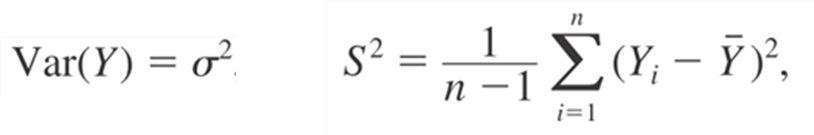

표준 편차는 분산에 루투를 씌운것

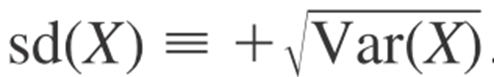

***
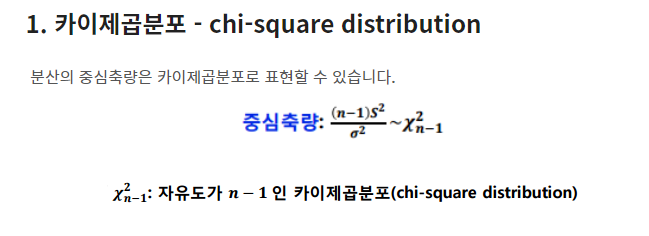

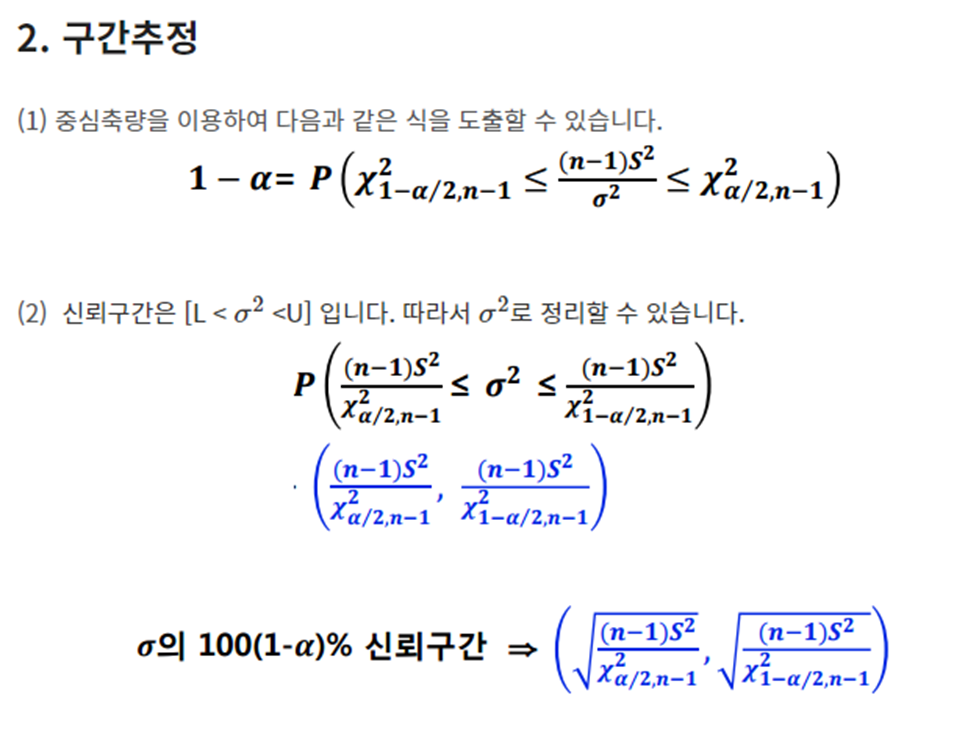

In [214]:
data = pd.read_csv('./data/22회/content.csv')
data

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232
...,...
195,100.568703
196,99.082193
197,100.163027
198,99.327200


# 4-1 연구가설과 귀무가설 작성
귀무가설 : 금속 재질 함유량의 분산이 1.3이다.

연구가설 : 금속 재질 함유량의 분산이 1.3이 아니다.

direction two-tailed
Q 328.29229803072917
q1 161.82618239364686
q2 239.9596818276442
1.78 < 2.14462305246205 < 2.64
t_025_ 161.82618239364686
t_975_ 239.9596818276442
pvalue  4.272666855017447e-08


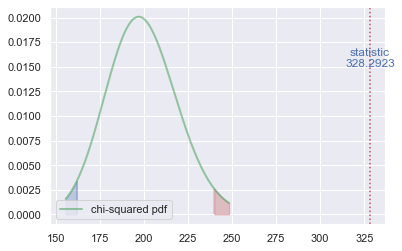

'H_0 rejected'

In [215]:
from scipy.stats import chi2

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    df = n - 1
    '''
    중심 축량
    '''
    Q = (n - 1) * np.var(x,ddof=1) / va0 
    print('direction',direction)
    if direction == "lower":
        q = chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = chi2.ppf(1 - alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        print('Q',Q)
        print('q1',q1)
        print('q2',q2)
        
        L_= round(((df*np.var(x, ddof=1))/q2),2) 
        U_= round(((df*np.var(x, ddof=1))/q1),2)
        print("{} < {} < {}".format(L_, np.var(x, ddof=1), U_)) 
       
        chi_ = chi2(df)
        t_025 = chi_.ppf(0.025) 
        t_975 = chi_.ppf(0.975) 
        
        x = np.linspace(chi_.ppf(0.01), chi_.ppf(0.99),1000)
        t_025_ = np.linspace(chi_.ppf(0.01),t_025,1000)
        t_975_ = np.linspace(t_975,chi_.ppf(0.99),1000)

        print('t_025_',t_025)
        print('t_975_',t_975)
        print('pvalue ' , chi2.sf(Q, df)* 2)
        
        plt.vlines(t_025, 0, chi_.pdf(t_025), colors="b", alpha=0.3)
        plt.vlines(t_975, 0, chi_.pdf(t_975), colors="r", alpha=0.3)
        plt.plot(x, chi_.pdf(x),'g-', lw=2, alpha=0.6, label='chi-squared pdf')
        plt.fill_between(t_025_, 0,chi_.pdf(t_025_), color ="b", alpha=0.3)
        plt.fill_between(t_975_, 0,chi_.pdf(t_975_), color ="r", alpha=0.3)
        plt.axvline(x=Q, color='r', linestyle=':')
        plt.text(Q , .015, 'statistic\n' + str(round(Q,4)), 
                 horizontalalignment='center', color='b')        
        plt.legend()
        plt.show()


        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
        
var_test(data['content'], va0 = 1.3)        

direction two-tailed
Q 18.100500000000004
q1 2.7003894999803584
q2 19.02276779864163
1.9 < 4.022333333333334 < 13.41
t_025_ 2.7003894999803584
t_975_ 19.02276779864163
pvalue  0.06805060630251018


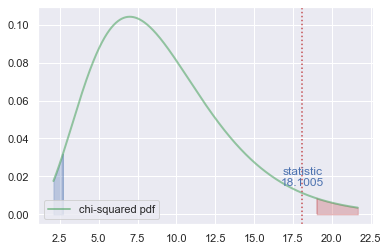

'H_0 not rejected'

In [216]:
data = np.array([20.0,21.5,20.9,19.8,22.5,20.3,23.6,18,23.3,17.8])
var_test(data, va0 = 2)       

In [180]:
np.var(data, ddof=1)

4.022333333333334

## 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/22회/error.csv')
data

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5
...,...,...
95,96,2.0
96,97,3.0
97,98,5.5
98,99,2.0


## 불량률 관리도 / 불량 개수 관리도

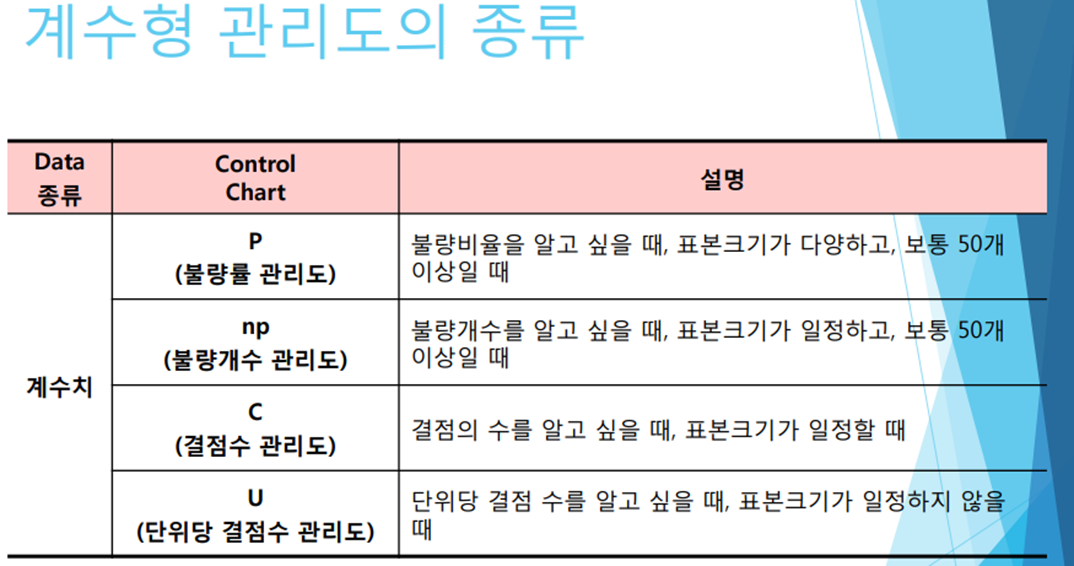

<font size="10">불량률(p) 관리도  </font>

- p관리도를 효과적으로 이용하기 위해서는 데이터가 충분히 층별로 모아져야 함.
- 검사개수 n과 불량개수 pn은 알고 있어야 함

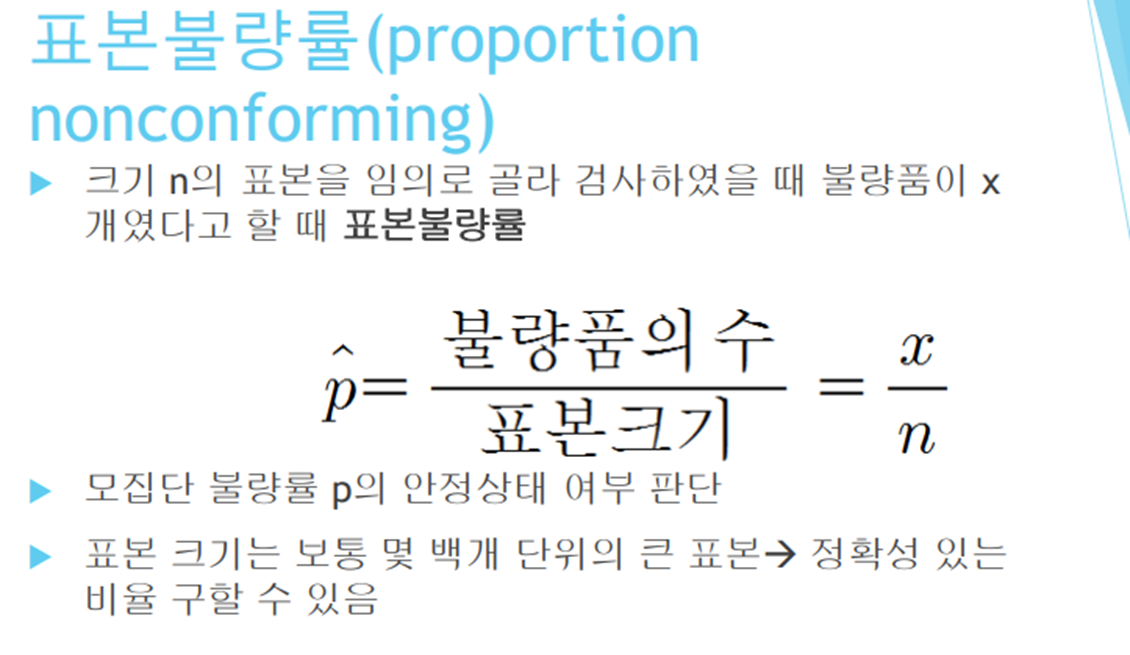

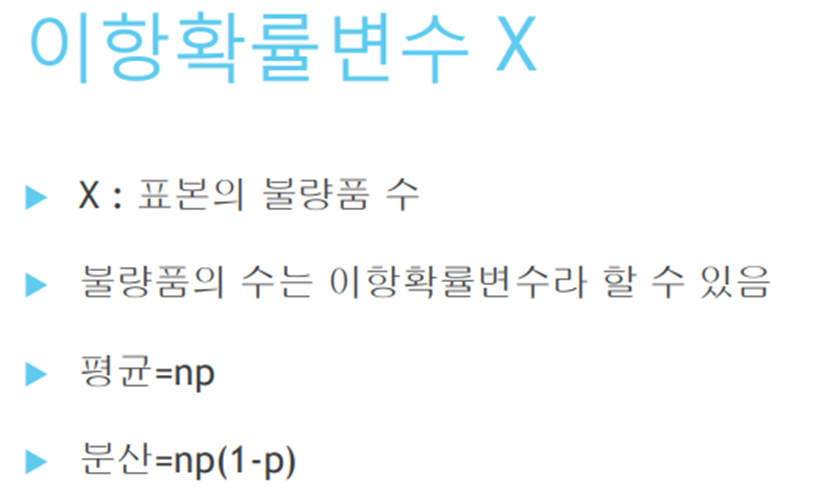

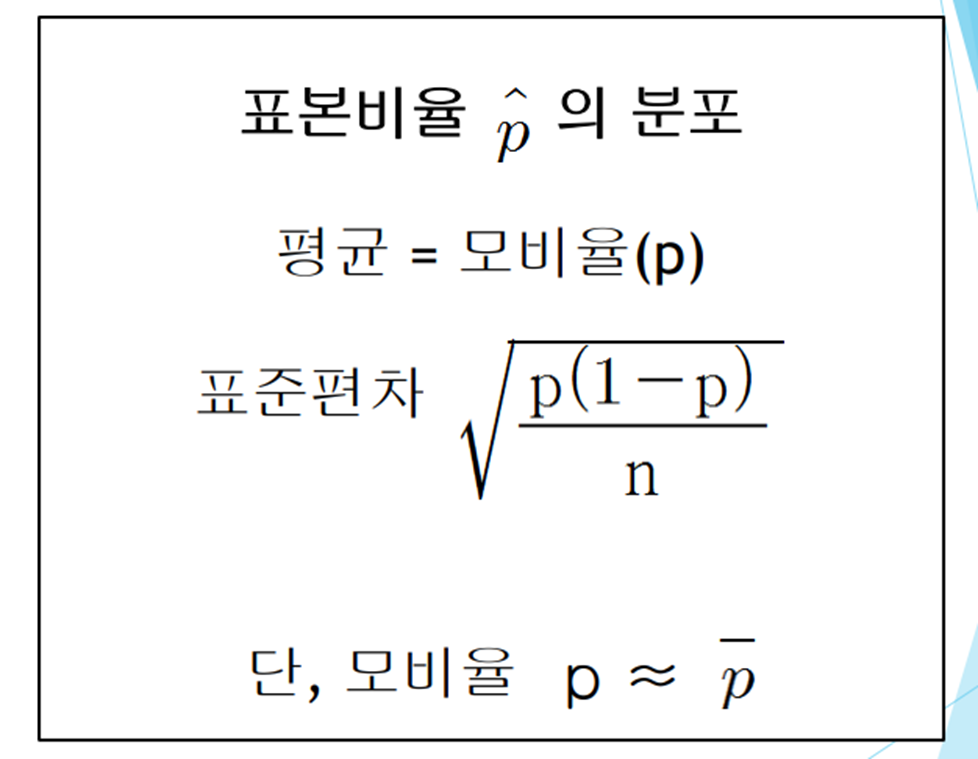

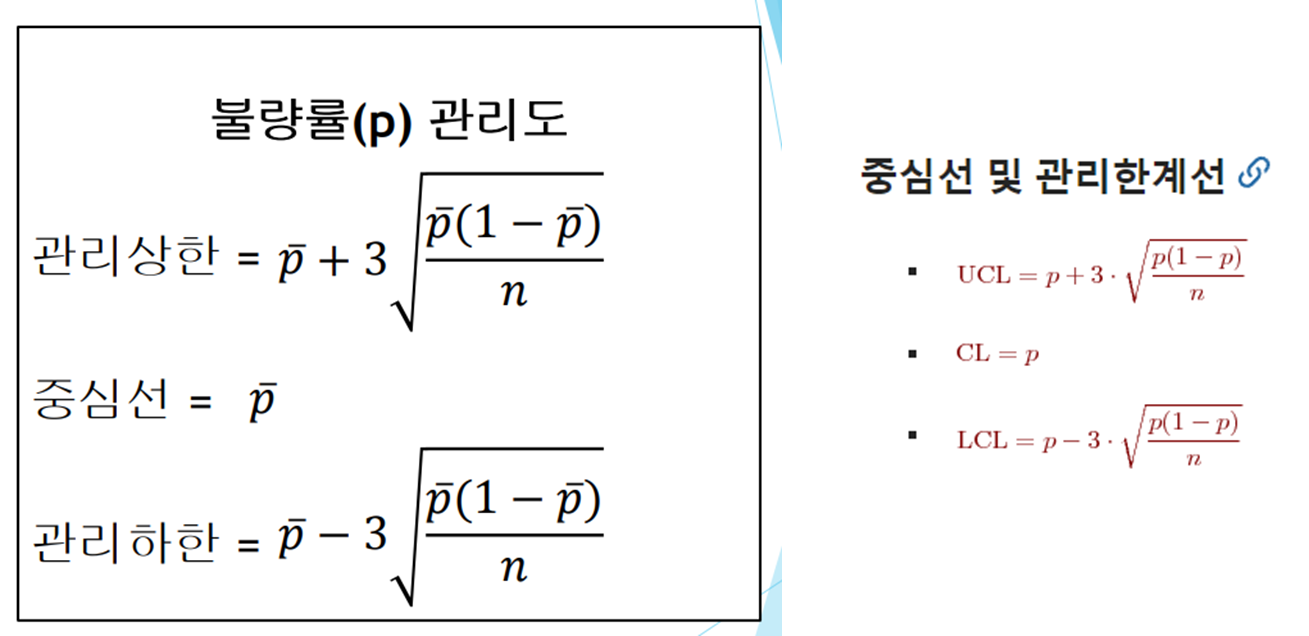

<font size="5"> P, UCL, LCL를 직접 계산해서 넣자... P 는 전체 표본수분에 불량수다.. 명심하자 </font>

In [45]:
CL = data['error_case_number'].sum() / (len(data) * 200 )
UCL = CL + 3* np.sqrt((CL * (1 - CL)) / 200)
LCL = CL - 3* np.sqrt((CL * (1 - CL)) / 200)

In [46]:
UCL, LCL ,CL

(0.04451212641985322, -0.010412126419853219, 0.01705)

In [56]:
'''
LCL 이 0보다 작기 때문에 0으로 설정
'''
LCL  = 0

In [49]:
data['error_case_number_ratio'] = data['error_case_number'] / 200

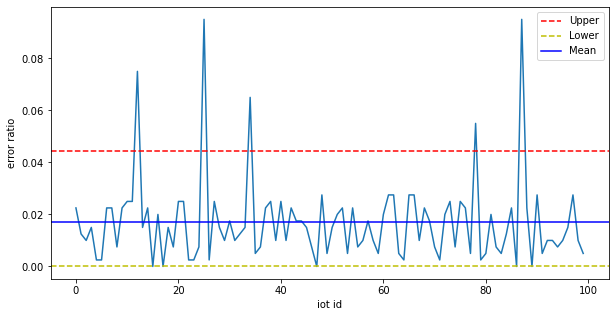

In [57]:
plt.figure(figsize=(10,5))
plt.plot(data['error_case_number_ratio'] )
plt.axhline(y=UCL, color='r', linestyle='--',label='Upper')
plt.axhline(y=LCL, color='y', linestyle='--',label='Lower')
plt.axhline(y=CL, color='b',label="Mean")
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()

<font size="10"> p 관리도(표본크기 다를 때)</font>  
표본마다 관리한계선을 달리한 경우

In [93]:
sample = np.array([170,170,170,170,200,230,85,80,80,
                   120,240,185,270,270,230,250,200,310,310,200])
error_count = np.array([8,5,10,12,11,15,4,5,0,6,11,9,13,16,10,9,6,14,16,10])

df = pd.DataFrame({'sample':sample, 'count':error_count})
P = df['count'].sum() / df['sample'].sum()
df['p'] = df['count'] / df['sample']

df['UCL'] = P +  3 * np.sqrt((P * (1-P)) / df['sample'])
df['LCL'] = P -   3 * np.sqrt((P * (1-P)) / df['sample'])


In [110]:
df.loc[df['LCL'] < 0, 'LCL'] = 0

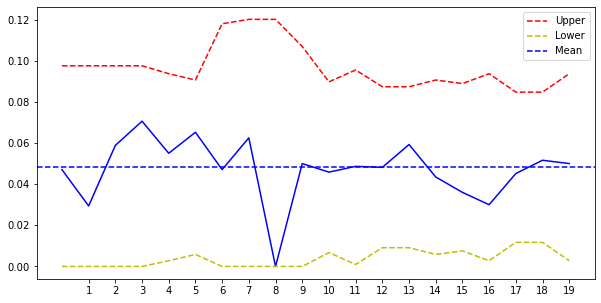

In [111]:

fig , ax = plt.subplots(figsize=(10,5))
ax.plot(df['p'] ,color='b')
ax.plot(df['UCL'] ,color='r' , linestyle='--',label='Upper')
ax.plot(df['LCL'] ,color='y' , linestyle='--',label='Lower')
plt.axhline(y=P, color='b', linestyle='--',label='Mean')

xticks = [i for i in range(1, 20)]
ax.set_xticks(xticks)
plt.legend()
plt.show()

In [112]:
df

,sample,count,p,UCL,LCL
0,170,8,0.047059,0.097517,0.000000
1,170,5,0.029412,0.097517,0.000000
2,170,10,0.058824,0.097517,0.000000
3,170,12,0.070588,0.097517,0.000000
4,200,11,0.055000,0.093670,0.002777
5,230,15,0.065217,0.090603,0.005844
6,85,4,0.047059,0.117935,0.000000
7,80,5,0.062500,0.120081,0.000000
8,80,0,0.000000,0.120081,0.000000
9,120,6,0.050000,0.106895,0.000000


In [115]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
df_scale = pd.DataFrame(stand.fit_transform(df), columns=df.columns)
df_scale

,sample,count,p,UCL,LCL
0,-0.398158,-0.360115,-0.008775,0.068984,-0.933696
1,-0.398158,-1.080346,-1.189094,0.068984,-0.933696
2,-0.398158,0.120038,0.778104,0.068984,-0.933696
3,-0.398158,0.600192,1.564983,0.068984,-0.933696
4,0.044240,0.360115,0.522368,-0.287732,-0.259930
5,0.486638,1.320423,1.205756,-0.572149,0.484399
6,-1.651619,-1.320423,-0.008775,1.962192,-0.933696
7,-1.725352,-1.080346,1.024004,2.161125,-0.933696
8,-1.725352,-2.280730,-3.156292,2.161125,-0.933696
9,-1.135488,-0.840269,0.187945,0.938488,-0.933696


<font size="10">p 관리도(표본크기 다를 때)</font>

표준화된 p관리도를 사용한 경우

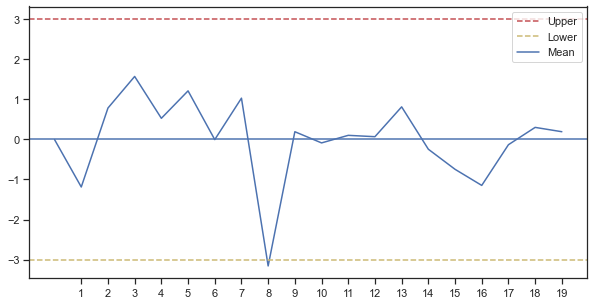

In [123]:


fig , ax = plt.subplots(figsize=(10,5))

ax.plot(df_scale['p'] ,color='b')

plt.axhline(y=3, color='r', linestyle='--',label='Upper')
plt.axhline(y=-3, color='y', linestyle='--',label='Lower')
plt.axhline(y=0, color='b',label="Mean")

xticks = [i for i in range(1, 20)]

ax.set_xticks(xticks)
plt.legend()
plt.show()

## 불량개수(np) 관리도

> <font size="5">표본의 크기 n이 매번 일정할 때 사용  
> 불량품의 개수를 세어 타점   
> 사용이 간편  
> 관리도의 의미는 p관리도와 동일  
</font>

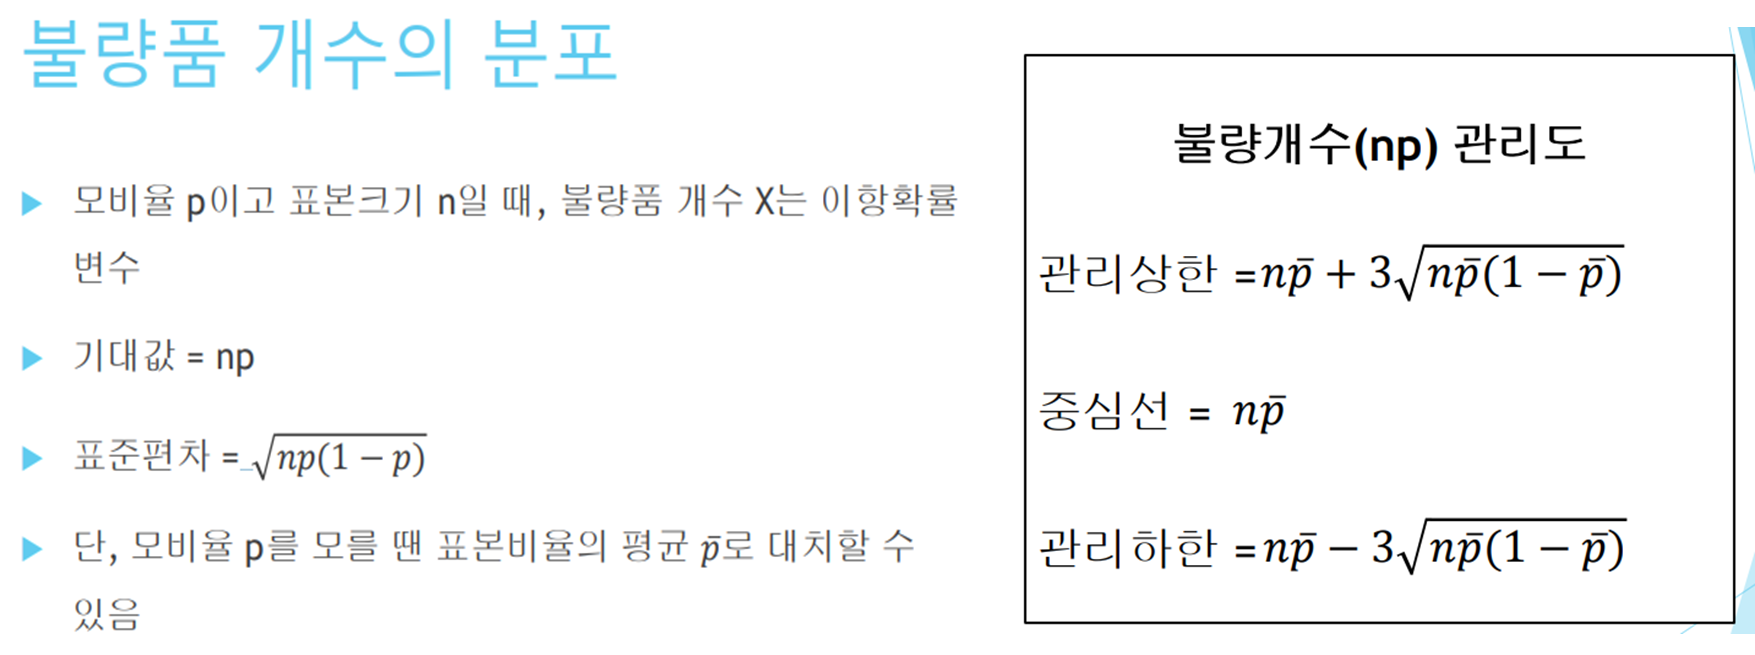

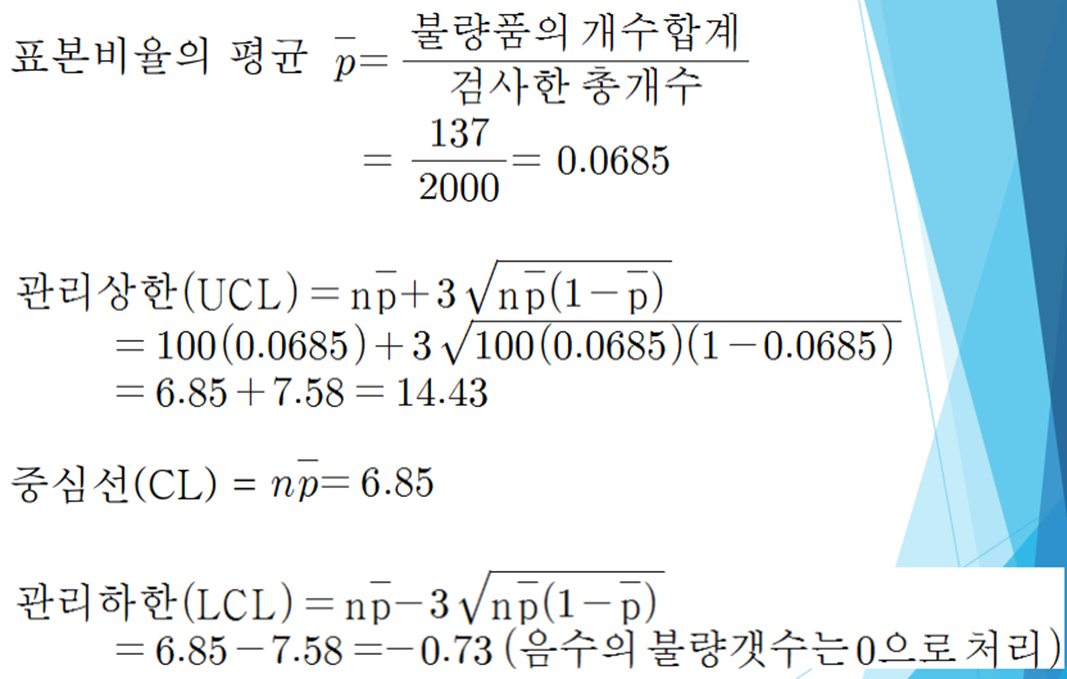

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/22회/error.csv')
data.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [131]:
P = data['error_case_number'].sum() / (len(data) * 200)
data['error_case_number_ratio'] = data['error_case_number'] / 200

In [133]:
UCL = 200 * P + 3 * np.sqrt(200 * P * (1 - P))
LCL = 200 * P - 3 * np.sqrt(200 * P * (1 - P))

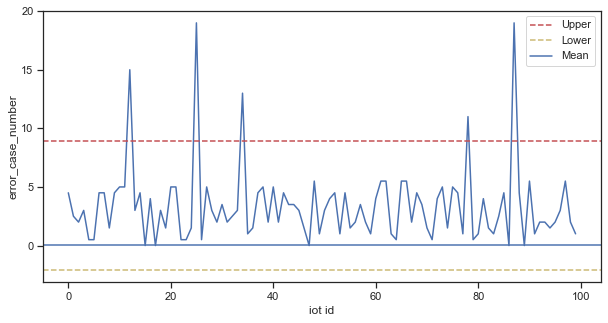

In [135]:
plt.figure(figsize=(10,5))
plt.plot(data['error_case_number'] )
plt.axhline(y=UCL, color='r', linestyle='--',label='Upper')
plt.axhline(y=LCL, color='y', linestyle='--',label='Lower')
plt.axhline(y=P, color='b',label="Mean")
plt.legend()
plt.ylabel('error_case_number')
plt.xlabel('iot id')
plt.show()

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.   

aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품의 패턴이 임의적인지 확인하라


<font size="5"> Run Test </font>

런(run)이란 동일한 관측값이 연속적으로 이어진 것(a sequence of like observations)을 말한다.

이분화된 자료가 아닌 경우는 이분화된 자료로 변환시켜야한다.

예를 들어, 평균보다 작은 관측값들은 첫 번째 범주에,

평균보다 크거나 같은 자료들은 두 번째 범주로 이분화시킨다.

1) 가설의 설정
>H_0 : 연속적인 관측값이 임의적이다.  
>H_1 : 연속적인 관측값이 임의적이 아니다

평균, 분산 

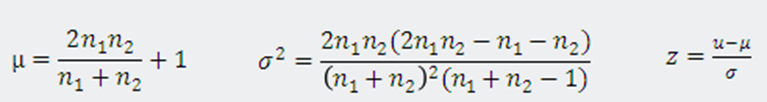

In [12]:
'''
n1 = 14   n2 = 15   u = 14

'''
a = 14
b = 15

mean =2*a*b/(a+b) +1
std = (2*a*b*(2*a*b-a-b)/(a+b)**2/(a+b-1))**0.5
print('mean : ',mean,'std : ',std)

mean :  15.482758620689655 std :  2.6408030342821784


In [14]:
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.sandbox.stats.runs import Runs
# 귀무가설 : 랜덤생성
# 대립 : 랜덤생성이 아님
# 데이터 이진 변환, 각 패턴들을 구분지을 필요없이 하나로 연결
x = [1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0]
Runs(np.array(x)).runs_test()

(-0.3721438547031917, 0.7097857460625617)

<font size="5"> 이분화된 자료가 아닌 경우는 이분화된 자료로 변환시켜야한다.</font>  
대부분 중위수를 이용한다.

In [3]:
import numpy as np 
data= np.array([50, 60, 70, 40, 30, 20, 10, 70, 80, 100])

np.median(data)

55.0

In [10]:
data_new = [1 if val >=55  else 0 for val in data  ]

In [11]:
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(data_new)

(-1.0062305898749053, 0.31430466047385397)